# Movies Industry Data Analysis Project - Data Correlation 

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [27]:
plt.style.use('seaborn')


In [28]:
movies = pd.read_csv(
    r'D:\PC\PC Files\Data Science\# Datasets\movies_industry\movies_industry\movies_industry.csv'
    )


### Data Exploration

In [29]:
movies.head() 


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [30]:
movies.info


<bound method DataFrame.info of                                                 name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

       

In [31]:
movies.columns


Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [32]:
movies.dtypes


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [33]:
# dropping duplicates

movies = movies.drop_duplicates()    
movies.shape    # no duplicates found, same number of rows 7668


(7668, 15)

In [34]:
# searching for missing values 

movies.isnull().sum(axis = 0)


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [35]:
# searching for missing values 

for col in movies.columns:
    pct_missing_values = np.mean(movies[col].isnull())
    print(col, '-', round(pct_missing_values * 100), '%')


name - 0 %
rating - 1 %
genre - 0 %
year - 0 %
released - 0 %
score - 0 %
votes - 0 %
director - 0 %
writer - 0 %
star - 0 %
country - 0 %
budget - 28 %
gross - 2 %
company - 0 %
runtime - 0 %


### Data Cleaning

In [36]:
movies.loc[np.logical_and(movies['budget'].isnull(), movies['gross'].isnull())]


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
41,Breaker Morant,PG,Drama,1980,"July 3, 1980 (Australia)",7.9,13000.0,Bruce Beresford,Jonathan Hardy,Edward Woodward,Australia,NaN,NaN,The South Australian Film Corporation,107.0
55,The Private Eyes,PG,Comedy,1980,"November 21, 1980 (United States)",6.7,2900.0,Lang Elliott,Tim Conway,Tim Conway,United States,NaN,NaN,Tri Star Productions,91.0
62,It's My Turn,R,Comedy,1980,"February 5, 1981 (Argentina)",5.5,875.0,Claudia Weill,Eleanor Bergstein,Jill Clayburgh,United States,NaN,NaN,Rastar Films,91.0
91,Mantis Fist Fighter,NaN,Action,1980,"July 9, 1982 (United States)",6.7,230.0,Wing-Cho Yip,Hsin-Yi Chang,Ka-Yan Leung,Hong Kong,NaN,NaN,East Asia Film Company,89.0
140,Southern Comfort,R,Action,1981,"September 25, 1981 (United States)",7.2,17000.0,Walter Hill,Michael Kane,Keith Carradine,United States,NaN,NaN,Cinema Group Ventures,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,Open,NaN,Drama,2019,"October 4, 2019 (United States)",7.9,73.0,Andoy Ranay,Wanggo Gallaga,JC Santos,Philippines,NaN,NaN,ABS-CBN Film Productions,105.0
7641,By Light of Desert Night,NaN,Drama,2019,"March 3, 2020 (United States)",4.8,373.0,David Stuart Snell,David Stuart Snell,Alexandra Bokova,United States,NaN,NaN,Canyon Media,94.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [37]:
# drop all gross nulls 
# most of gross nulls are also budget nulls so drop all gross nulls 

movies.dropna(subset = 'gross', inplace = True)
movies


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,NaN,3661.0,Prowess Pictures,98.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,NaN,240663149.0,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,NaN,413378.0,Pryor Entertainment,120.0
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0


In [38]:
movies.fillna({'rating': 'G', 'budget': 0, 'gross': 0}, inplace = True )
movies


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,0.0,3661.0,Prowess Pictures,98.0
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300.0,Teng Cheng,NaN,Guangtao Jiang,China,0.0,240663149.0,Beijing Enlight Pictures,110.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,0.0,413378.0,Pryor Entertainment,120.0
7657,Leap,G,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,0.0,25818882.0,NaN,135.0


In [39]:
correlation_Matrix = movies.corr(method = 'pearson') 

correlation_Matrix    # very high correlation value between budget and gross --> 0.748719


,year,score,votes,budget,gross,runtime
year,1.000000,0.091821,0.215740,0.303230,0.257486,0.114706
score,0.091821,1.000000,0.413096,0.051515,0.186258,0.397321
votes,0.215740,0.413096,1.000000,0.483073,0.630757,0.309536
budget,0.303230,0.051515,0.483073,1.000000,0.748719,0.268144
gross,0.257486,0.186258,0.630757,0.748719,1.000000,0.245216
runtime,0.114706,0.397321,0.309536,0.268144,0.245216,1.000000


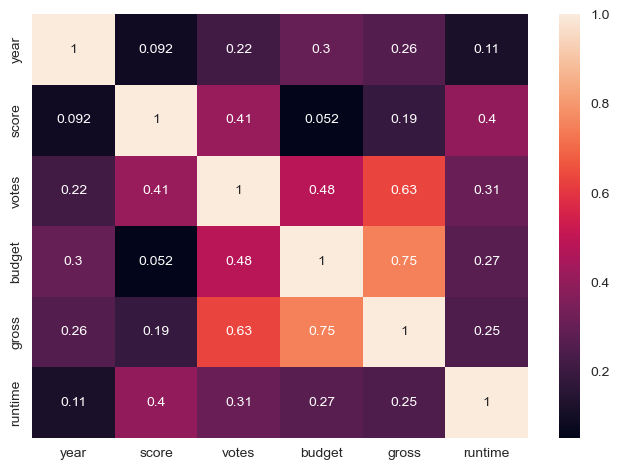

In [40]:
sns.heatmap(correlation_Matrix, annot = True)
plt.show()


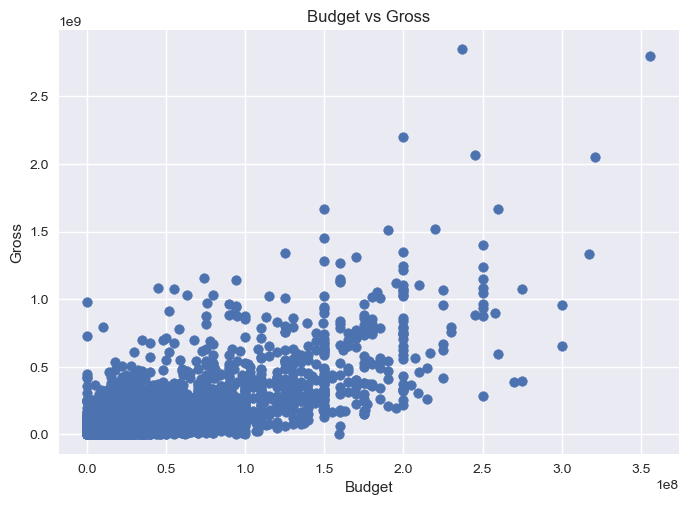

In [41]:
plt.scatter(movies['budget'], movies['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()


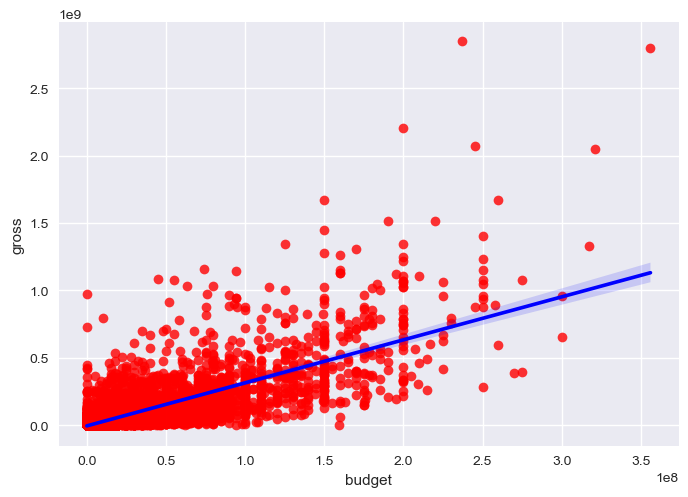

In [42]:
sns.regplot(x = 'budget', y = 'gross', data = movies, 
            scatter_kws = {'color': 'red'}, line_kws = {'color': 'blue'})
plt.show()


In [43]:
# considering all columns to be added according to random numbers for non numeric columns(object)

movies_num = movies

for col in movies_num.columns:
    if movies_num[col].dtype == 'object':
        movies_num[col] = movies_num[col].astype('category')
        movies_num[col] = movies_num[col].cat.codes

# now all non numeric data transformed into numeric data

movies_num


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6428,6,6,1980,1669,8.4,927000.0,2500,3890,994,52,19000000.0,46998772.0,2213,146.0
1,5426,6,1,1980,1460,5.8,65000.0,2189,1578,313,53,4500000.0,58853106.0,701,104.0
2,5006,4,0,1980,1733,8.7,1200000.0,1072,2485,1666,53,18000000.0,538375067.0,1470,124.0
3,280,4,4,1980,1460,7.7,221000.0,1260,1936,2146,53,3500000.0,83453539.0,1728,88.0
4,1001,6,4,1980,1509,7.3,108000.0,1019,507,394,53,6000000.0,39846344.0,1695,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,6321,6,5,2020,91,5.4,2400.0,2430,3760,2336,53,0.0,3661.0,1817,98.0
7655,3105,9,2,2020,2748,6.6,1300.0,2620,-1,885,8,0.0,240663149.0,360,110.0
7656,6851,5,4,2020,1847,5.0,294.0,2425,3753,2276,53,0.0,413378.0,1819,120.0
7657,3088,1,6,2020,3205,6.7,903.0,2112,1932,870,8,0.0,25818882.0,-1,135.0


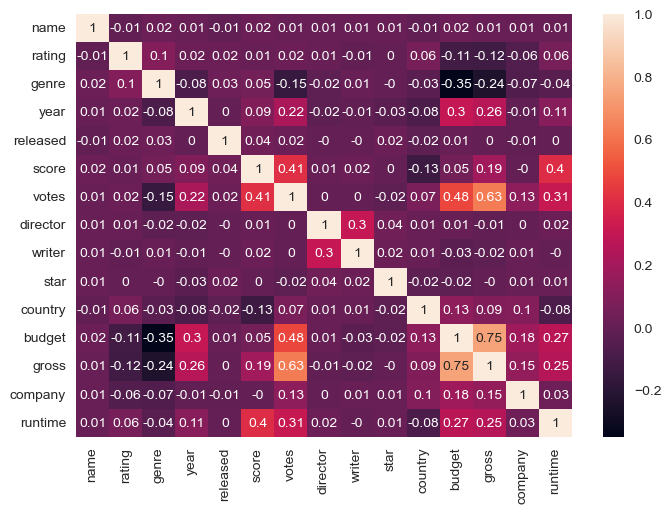

In [44]:
# checking the correlation now 

correlation_Matrix_num = round(movies_num.corr(method = 'pearson'), 2)

sns.heatmap(correlation_Matrix_num, annot = True)
plt.show()


In [45]:
movies_num.corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.007791,0.017885,0.007404,-0.011033,0.015473,0.011429,0.009092,0.008008,0.007278,-0.012027,0.018937,0.005557,0.008155,0.009142
rating,-0.007791,1.000000,0.098584,0.017238,0.022834,0.007656,0.024794,0.014590,-0.006155,0.004180,0.056603,-0.108219,-0.116814,-0.063438,0.064284
genre,0.017885,0.098584,1.000000,-0.082252,0.026804,0.046093,-0.149289,-0.016412,0.008231,-0.002322,-0.033283,-0.345290,-0.243059,-0.074570,-0.041023
year,0.007404,0.017238,-0.082252,1.000000,0.002465,0.091821,0.215740,-0.019116,-0.008780,-0.032319,-0.084488,0.303230,0.257486,-0.014883,0.114706
released,-0.011033,0.022834,0.026804,0.002465,1.000000,0.044301,0.018043,-0.002315,-0.002699,0.015812,-0.020083,0.011878,0.002341,-0.007031,0.000605
score,0.015473,0.007656,0.046093,0.091821,0.044301,1.000000,0.413096,0.008810,0.018648,0.000310,-0.129474,0.051515,0.186258,-0.001107,0.397321
votes,0.011429,0.024794,-0.149289,0.215740,0.018043,0.413096,1.000000,0.000919,0.000972,-0.021274,0.069934,0.483073,0.630757,0.131020,0.309536
director,0.009092,0.014590,-0.016412,-0.019116,-0.002315,0.008810,0.000919,1.000000,0.297601,0.036794,0.014435,0.005914,-0.014490,0.004213,0.016942
writer,0.008008,-0.006155,0.008231,-0.008780,-0.002699,0.018648,0.000972,0.297601,1.000000,0.023374,0.011871,-0.026074,-0.023574,0.005972,-0.002816
star,0.007278,0.004180,-0.002322,-0.032319,0.015812,0.000310,-0.021274,0.036794,0.023374,1.000000,-0.016192,-0.022397,-0.002602,0.007518,0.009227


In [46]:
# to print the random categories the python built 

correlation_Matrix_2 = movies_num.corr()
corr_pairs = correlation_Matrix_2.unstack()
corr_pairs


name     name        1.000000
         rating     -0.007791
         genre       0.017885
         year        0.007404
         released   -0.011033
                       ...   
runtime  country    -0.078174
         budget      0.268144
         gross       0.245216
         company     0.031255
         runtime     1.000000
Length: 225, dtype: float64

***

##### Testing and Debugging

In [47]:
# Testing & Debugging
# movies['ID'] = movies.index + 1


In [48]:
# Testing & Debugging
# movies['budget'] = movies['budget'].astype('int64')
# movies['gross'].astype('int64')


In [49]:
# Testing & Debugging
# movies.loc[[0],['gross']] 
# movies.loc[[25],['gross']].index


In [50]:
# Testing & Debugging
# for i, x in movies[['ID', 'gross']]:
#     print(i)
#     print(x)
#     if i > 3000000:
#         movies.loc[[i],['gross']] = 0
#         movies.fillna({'budget': }, inplace = True )
# movies.fillna({'budget': 0}, inplace = True )


In [51]:
# Testing & Debugging
# movies.boxplot(column = 'budget', column = 'gross')


In [52]:
# Testing & Debugging
# movies['name']


In [53]:
# Testing & Debugging
# z = 0
# for x in movies.columns:
#     for y in movies[]
